In [1]:
#Импорт библиотек
import pandas as pd
import requests
import matplotlib.pyplot as plt
import time

In [2]:
# Список для хранения данных по годам
all_data = []

In [3]:
# Заголовки запроса
headers = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
}

In [4]:
# Базовый URL для запросов - поменялся с index на shares
base_url = "http://iss.moex.com/iss/engines/stock/markets/shares/securities/MGNT/candles.json"

In [5]:
# Цикл по годам с 2017 по 2025
for year in range(2017, 2026):
    # Формируем даты начала и конца года
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    
    # Формируем URL для текущего года
    url = f"{base_url}?from={start_date}&till={end_date}&interval=24"
    
    print(f"Запрашиваем данные MGNT за {year} год...")
    
    # Отправляем запрос
    response = requests.get(url, headers=headers)
    
    # Проверяем успешность запроса
    if response.status_code == 200: # 200 - код HTTP об успешном выполнении
        # Преобразуем данные из JSON
        json_data = response.json()
        
        # Проверяем наличие данных
        # "candles" in json_data — проверяет, существует ли ключ "candles" в полученном JSON-объекте
        # "data" in json_data["candles"] — проверяет, существует ли ключ "data" внутри объекта "candles"
        # json_data["candles"]["data"] — проверяет, не пустой ли массив данных (в Python пустые списки в условиях оцениваются как False)
        if "candles" in json_data and "data" in json_data["candles"] and json_data["candles"]["data"]:
            # Создаем список словарей из данных
            data = [{k: r[i] for i, k in enumerate(json_data["candles"]["columns"])} 
                  for r in json_data["candles"]["data"]]
            
            # Добавляем данные в общий список
            all_data.extend(data)
            
            print(f"Загружено {len(data)} записей за {year} год")
        else:
            print(f"Нет данных за {year} год")
    else:
        print(f"Ошибка при запросе данных за {year} год: {response.status_code}")
    
    # Делаем паузу между запросами, чтобы не нагружать сервер
    time.sleep(1)

Запрашиваем данные MGNT за 2017 год...
Загружено 252 записей за 2017 год
Запрашиваем данные MGNT за 2018 год...
Загружено 254 записей за 2018 год
Запрашиваем данные MGNT за 2019 год...
Загружено 252 записей за 2019 год
Запрашиваем данные MGNT за 2020 год...
Загружено 250 записей за 2020 год
Запрашиваем данные MGNT за 2021 год...
Загружено 255 записей за 2021 год
Запрашиваем данные MGNT за 2022 год...
Загружено 234 записей за 2022 год
Запрашиваем данные MGNT за 2023 год...
Загружено 254 записей за 2023 год
Запрашиваем данные MGNT за 2024 год...
Загружено 256 записей за 2024 год
Запрашиваем данные MGNT за 2025 год...
Загружено 78 записей за 2025 год


In [6]:
#Преобразование в датафрейм
df_conpany = pd.DataFrame(all_data)

In [7]:
df_conpany.head()

,open,close,high,low,value,volume,begin,end
0,11015.0,11347.0,11476.0,10902.0,1.451153e+09,128257,2017-01-03 00:00:00,2017-01-03 23:59:59
1,11330.0,11220.0,11367.0,11118.0,8.856302e+08,78698,2017-01-04 00:00:00,2017-01-04 23:59:59
2,11180.0,10875.0,11316.0,10850.0,1.095850e+09,98876,2017-01-05 00:00:00,2017-01-05 23:59:59
3,10786.0,10900.0,10978.0,10786.0,9.621446e+08,88308,2017-01-06 00:00:00,2017-01-06 23:59:59
4,10900.0,10819.0,10993.0,10704.0,1.526111e+09,140599,2017-01-09 00:00:00,2017-01-09 23:59:59


In [8]:
len(df_conpany)

2085

In [9]:
# Сохраняем в CSV
filename = "magnit_data_2017_2025.csv"
df_conpany.to_csv(filename, index=False)

In [10]:
pd.read_csv('/Users/narciss/Desktop/ВКР/Code 4. Практическая версия/magnit_data_2017_2025.csv')

,open,close,high,low,value,volume,begin,end
0,11015.0,11347.0,11476.0,10902.0,1.451153e+09,128257,2017-01-03 00:00:00,2017-01-03 23:59:59
1,11330.0,11220.0,11367.0,11118.0,8.856302e+08,78698,2017-01-04 00:00:00,2017-01-04 23:59:59
2,11180.0,10875.0,11316.0,10850.0,1.095850e+09,98876,2017-01-05 00:00:00,2017-01-05 23:59:59
3,10786.0,10900.0,10978.0,10786.0,9.621446e+08,88308,2017-01-06 00:00:00,2017-01-06 23:59:59
4,10900.0,10819.0,10993.0,10704.0,1.526111e+09,140599,2017-01-09 00:00:00,2017-01-09 23:59:59
...,...,...,...,...,...,...,...,...
2080,4475.0,4395.0,4475.0,4212.5,4.480454e+09,1031779,2025-04-07 00:00:00,2025-04-07 23:59:49
2081,4398.0,4345.0,4563.5,4335.0,3.268830e+09,735597,2025-04-08 00:00:00,2025-04-08 23:59:51
2082,4345.0,4518.0,4532.0,4183.0,4.976088e+09,1143719,2025-04-09 00:00:00,2025-04-09 23:59:53
2083,4529.5,4600.0,4642.5,4413.0,2.028858e+09,447455,2025-04-10 00:00:00,2025-04-10 19:04:15


In [11]:
# Преобразуем столбец с датами для правильного отображения на графике
df_conpany['begin'] = pd.to_datetime(df_conpany['begin'])

In [12]:
df_conpany.head()

,open,close,high,low,value,volume,begin,end
0,11015.0,11347.0,11476.0,10902.0,1.451153e+09,128257,2017-01-03,2017-01-03 23:59:59
1,11330.0,11220.0,11367.0,11118.0,8.856302e+08,78698,2017-01-04,2017-01-04 23:59:59
2,11180.0,10875.0,11316.0,10850.0,1.095850e+09,98876,2017-01-05,2017-01-05 23:59:59
3,10786.0,10900.0,10978.0,10786.0,9.621446e+08,88308,2017-01-06,2017-01-06 23:59:59
4,10900.0,10819.0,10993.0,10704.0,1.526111e+09,140599,2017-01-09,2017-01-09 23:59:59


In [13]:
df_conpany["begin"].dt.year.unique()

array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype=int32)

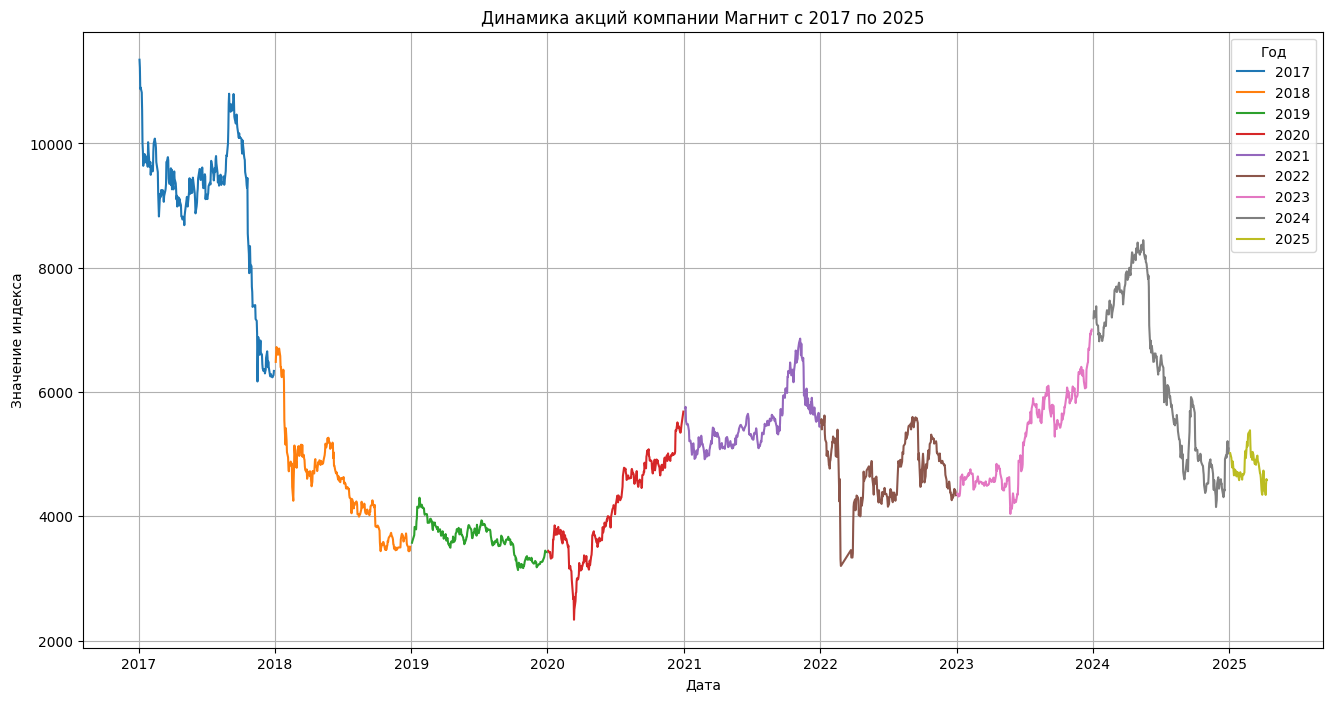

In [14]:
# Создаем график по годам
plt.figure(figsize=(16, 8))

# Перебираем уникальные годы и строим графики разными цветами
for year in df_conpany['begin'].dt.year.unique():
    # Фильтруем данные по текущему году
    year_data = df_conpany[df_conpany['begin'].dt.year == year]
    
    # Строим линию для текущего года
    plt.plot(year_data['begin'], year_data['close'], label=str(year))

# Настраиваем график
plt.title('Динамика акций компании Магнит с 2017 по 2025')
plt.xlabel('Дата')
plt.ylabel('Значение индекса')
plt.grid(True) #Добавление сетки координат
plt.legend(title='Год')
#plt.xticks(rotation=45) можно сделать наклон под углом (45 гр) обозначений на оси X

# Отображаем график
#plt.tight_layout() #можно добавить автоматическую регулировку отображения графика
plt.show()